In [2]:
# import libraries
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
    pass
import tensorflow as tf
import pandas as pd
from tensorflow import keras
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.20.0-dev20250526


In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv

train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

--2025-05-29 19:34:37--  https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 104.26.2.33, 172.67.70.149
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 358233 (350K) [text/tab-separated-values]
Saving to: ‘train-data.tsv’

train-data.tsv      100%[===================>] 349.84K  1.08MB/s    in 0.3s    

2025-05-29 19:34:39 (1.08 MB/s) - ‘train-data.tsv’ saved [358233/358233]

--2025-05-29 19:34:39--  https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 118774 (116K) [text/tab-separated-values]
Saving to: ‘valid-data.tsv’

valid-data.tsv      100%[===================>] 11

In [21]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])

In [22]:
train_df = pd.read_csv(train_file_path, sep='\t', names=['label', 'text'])
print(train_df.tail())

     label                                               text
4174   ham  just woke up. yeesh its late. but i didn't fal...
4175   ham  what do u reckon as need 2 arrange transport i...
4176  spam  free entry into our £250 weekly competition ju...
4177  spam  -pls stop bootydelious (32/f) is inviting you ...
4178   ham  tell my  bad character which u dnt lik in me. ...


In [23]:
test_df = pd.read_csv(test_file_path, sep='\t', names=['label', 'text'])
print(test_df.tail())

     label                                               text
1387   ham  true dear..i sat to pray evening and felt so.s...
1388   ham               what will we do in the shower, baby?
1389   ham  where are you ? what are you doing ? are yuou ...
1390  spam  ur cash-balance is currently 500 pounds - to m...
1391  spam  not heard from u4 a while. call 4 rude chat pr...


In [25]:
train_df['label'] = train_df['label'].replace({'ham': 1, 'spam': 0})
test_df['label'] = test_df['label'].replace({'ham':1, 'spam':0})

In [26]:
print(train_df)

      label                                               text
0         1  ahhhh...just woken up!had a bad dream about u ...
1         1                           you can never do nothing
2         1  now u sound like manky scouse boy steve,like! ...
3         1  mum say we wan to go then go... then she can s...
4         1  never y lei... i v lazy... got wat? dat day ü ...
...     ...                                                ...
4174      1  just woke up. yeesh its late. but i didn't fal...
4175      1  what do u reckon as need 2 arrange transport i...
4176      0  free entry into our £250 weekly competition ju...
4177      0  -pls stop bootydelious (32/f) is inviting you ...
4178      1  tell my  bad character which u dnt lik in me. ...

[4179 rows x 2 columns]


In [27]:
print(test_df)

      label                                               text
0         1  i am in hospital da. . i will return home in e...
1         1         not much, just some textin'. how bout you?
2         1  i probably won't eat at all today. i think i'm...
3         1  don‘t give a flying monkeys wot they think and...
4         1                                who are you seeing?
...     ...                                                ...
1387      1  true dear..i sat to pray evening and felt so.s...
1388      1               what will we do in the shower, baby?
1389      1  where are you ? what are you doing ? are yuou ...
1390      0  ur cash-balance is currently 500 pounds - to m...
1391      0  not heard from u4 a while. call 4 rude chat pr...

[1392 rows x 2 columns]


In [29]:
for index, row in train_df.iterrows():
    text = row['text']
    label = row['label']
    print('text:', text)
    print('label:', label)
    break 

text: ahhhh...just woken up!had a bad dream about u tho,so i dont like u right now :) i didnt know anything about comedy night but i guess im up for it.
label: 1


In [40]:
# Convert Pandas dataframe to Tensorflow dataset

train_dataset = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['label'].values))
test_dataset = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['label'].values))

In [41]:
train_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [42]:
test_dataset.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [43]:
# Shuffle data for training

BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [44]:
train_ds = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [66]:
for example, label in train_ds.take(5):
    print('texts: ', example.numpy()[:3])
    print()
    print('labels: ', label.numpy()[:3])
    print()

texts:  [b"at 4. let's go to bill millers"
 b'gud ni8 dear..slp well..take care..swt dreams..muah..'
 b'cool. i am  &lt;#&gt;  inches long. hope you like them big!']

labels:  [1 1 1]

texts:  [b'do u hav any frnd by name ashwini in ur college?'
 b"pansy! you've been living in a jungle for two years! its my driving you should be more worried about!"
 b"sorry, i'll call later"]

labels:  [1 1 1]

texts:  [b'win a year supply of cds 4 a store of ur choice worth \xc2\xa3500 & enter our \xc2\xa3100 weekly draw txt music to 87066 ts&cs www.ldew.com.subs16+1win150ppmx3'
 b'okie...'
 b'pls ask macho how much is budget for bb bold 2 is cos i saw a new one for  &lt;#&gt;  dollars.']

labels:  [0 1 1]

texts:  [b"babe, have you got enough money to pick up bread and milk ? and i'll give you it back when you get home ?"
 b'hey you gave them your photo when you registered for driving ah? tmr wanna meet at yck?'
 b"you will be receiving this week's triple echo ringtone shortly. enjoy it!"]

labels: 

In [73]:
# Create text encoder

In [74]:
VOCAB_SIZE = 1000

# Transforms raw text input into numeric tokens to use for ML model

encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(train_ds.map(lambda text, label: text))

In [75]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'to', 'i', 'you', 'a', 'the', 'u', 'and', 'in', 'is',
       'me', 'my', 'for', 'your', 'of', 'it', 'call', 'have', 'on'],
      dtype='<U15')

In [76]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[  1,   1,   1,  29,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,  68,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0],
       [  1,   6,   1, 733, 178,  15,  16, 234, 447, 169,  16, 503,   1,
         31,  39, 118,   1,  40, 270,  19, 622,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,

In [77]:
for n in range(3):
    print("Original: ", example[n].numpy())
    print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
    print()

Original:  b'waqt se pehle or naseeb se zyada kisi ko kuch nahi milta,zindgi wo nahi he jo hum sochte hai zindgi wo hai jo ham jeetey hai..........'
Round-trip:  [UNK] [UNK] [UNK] or [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] he [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK] [UNK]                                                                                 

Original:  b'usually the body takes care of it buy making sure it doesnt progress. can we pls continue this talk on saturday.'
Round-trip:  [UNK] the [UNK] takes care of it buy making sure it doesnt [UNK] can we pls [UNK] this talk on saturday                                                                                      

Original:  b"hi. i'm always online on yahoo and would like to chat with you someday"
Round-trip:  hi im always online on [UNK] and would like to chat with you [UNK]                                                                                             



In [90]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_2            │ (1, None)              │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [91]:
print([layer.supports_masking for layer in model.layers])

[False, True, True, True, True]


In [92]:
# Predict on a sample text without padding.
# Predictions are poor before training.

sample_text = ('The movie was cool. The animation and the graphics were out of this world. I would recommend this movie.')

predictions = model.predict(np.array([sample_text], dtype=object)) 

print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 652ms/step
[0.50282246]


In [93]:
sample_text = ('Congratulations! You won a $500 gift card to Target. Click here to claim your reward.')

predictions = model.predict(np.array([sample_text], dtype=object)) 

print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[0.50145423]


In [95]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding], dtype=object))
print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
[0.50145423]


In [96]:
# Compile the model

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [97]:
history = model.fit(train_ds, epochs=10,
                    validation_data=test_ds,
                    validation_steps=30)

Epoch 1/10


/Users/adisontan/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:789: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


66/66 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.8491 - loss: 0.6740 - val_accuracy: 0.8708 - val_loss: 0.5774
Epoch 2/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - accuracy: 0.8617 - loss: 0.5323 - val_accuracy: 0.8708 - val_loss: 0.4255
Epoch 3/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.8727 - loss: 0.3927 - val_accuracy: 0.8729 - val_loss: 0.2989
Epoch 4/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.8892 - loss: 0.2620 - val_accuracy: 0.9620 - val_loss: 0.1691
Epoch 5/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.9682 - loss: 0.1613 - val_accuracy: 0.9745 - val_loss: 0.1064
Epoch 6/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.9735 - loss: 0.1133 - val_accuracy: 0.9812 - val_loss: 0.0689
Epoch 7/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - accuracy: 0.9823 - loss: 0.0692 - val_accuracy: 0.9812 - val_loss: 0.0661
Epoch 8/10
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - accuracy: 0.9832 - loss: 0.0619 - val_accuracy: 0.9875 - val_loss: 0.

Test Loss: 0.04413110390305519
Test Accuracy: 0.9885140061378479


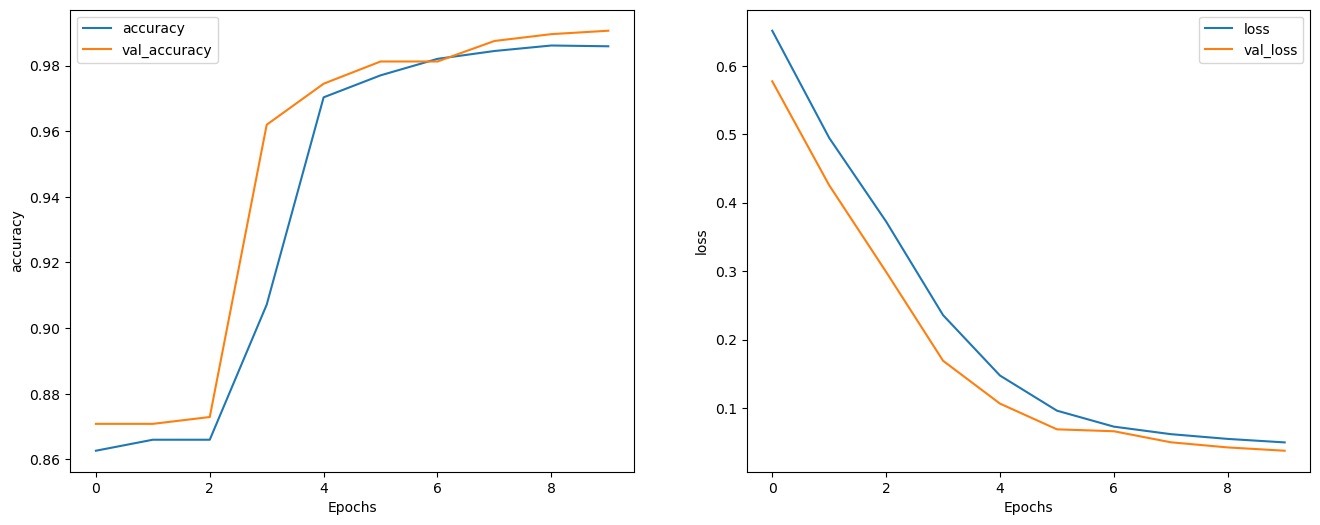

In [110]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

test_loss, test_acc = model.evaluate(test_ds, verbose=False)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

In [129]:
sample_text = ('Congratulations! You won a $500 gift card to Target. Click here to claim your reward.')

predictions = model.predict(np.array([sample_text], dtype=object))
print(predictions[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0.0639623]


In [126]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    
    prediction = model.predict(np.array([pred_text], dtype=object)) 
    if prediction[0] > 0.5:
        label = 'ham'
    else:
        label = 'spam'
    
    return (prediction[0], label)

pred_text = "how are you doing today?"

prediction = predict_message(pred_text)
print('Accuracy: ', prediction[0])
print('Label: ', prediction[1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Accuracy:  [0.98618615]
Label:  ham


In [128]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True

    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
        if prediction[1] != ans:
            passed = False

    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

test_predictions()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
You passed the challenge. Great job!
